In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjens\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
# Load dataset into Pandas DataFrame
statements = pd.read_csv("dataset/Statements/statements.csv")
statements.columns

Index(['Statement', 'Emotion'], dtype='object')

In [90]:
# Markup:: Data Splitting

In [91]:
# Split data now to avoid "leaking"
# We need training data and validation data
from sklearn.model_selection import train_test_split

X = statements["Statement"].copy()
y = statements["Emotion"].copy()
testSize = 0.20
randomState = 474

In [92]:
XTrainRaw, XValidRaw, yTrain, yValidate = \
    train_test_split(X, y, test_size=testSize, random_state=randomState)

In [93]:
# Markup:: Data Vectorization, Text Extraction , reintroduce variable names used in last block

In [94]:
# Using Term Frequency - Inverse Document Frequency
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

maxFeatures = 2600
minDf = 7
maxDf = 0.8
stopWords = stopwords.words("english")

In [95]:
tfIdfVectorizer = TfidfVectorizer(max_features=maxFeatures, min_df=minDf, max_df=maxDf, stop_words=stopWords)
XTrain = tfIdfVectorizer.fit_transform(XTrainRaw).toarray()
XTrain.shape

(16000, 2527)

In [96]:
# Markup:: The Model

In [97]:
# Create the Random Forest Classifier Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import RandomForestClassifier

nEstimators = 25
modelRandomState = 887

In [98]:
model = RandomForestClassifier(n_estimators=nEstimators, random_state=modelRandomState)
model = model.fit(XTrain, yTrain)
predictionsTrain = model.predict(XTrain)

accuracy (on X_train): 0.9959


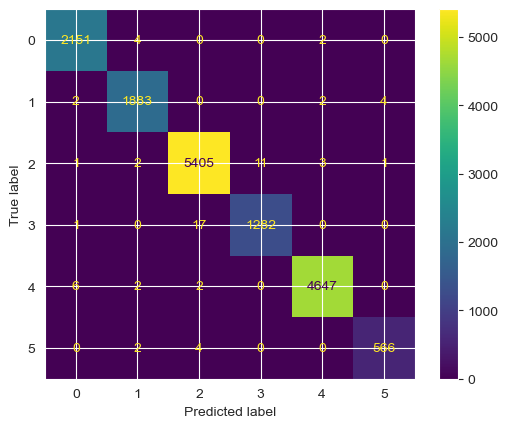

In [99]:
disp = ConfusionMatrixDisplay(confusion_matrix(yTrain, predictionsTrain))
disp.plot()

print(f"accuracy (on X_train): {accuracy_score(yTrain, predictionsTrain):.4f}")